In [11]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

In [12]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [13]:
# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [14]:
# We could also get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [15]:
# All good data analysis projects begin with trying to answer questions.
# Now that we know what column category data we have let's think of some
# questions or insights we would like to obtain from the data.
# So here's a list of questions we'll try to answer using our new data analysis skills!

#First some basic questions:

#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2.) What deck were the passengers on and how does that relate to their class?
#3.) Where did the passengers come from?
#4.) Who was alone and who was with family?

# Then we'll dig deeper, with a broader question:

#5.) What factors helped someone survive the sinking?
# So let's start with the first question: Who were the passengers on the titanic?

In [16]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

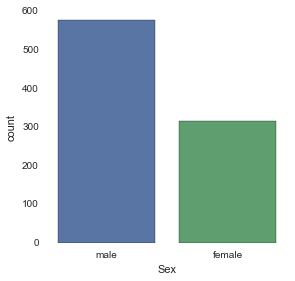

In [18]:
# Let's first check gender
# Let's create a factor plot
# Pass the gender - sex column from dataframe 'titanic_df'
# Indicate where data is coming from 'titanic_df'
sns.factorplot('Sex',data=titanic_df, kind='count')

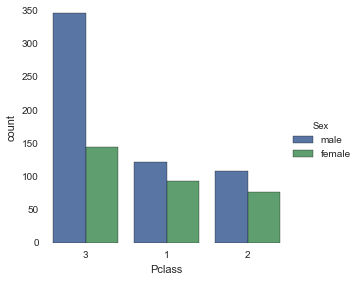

In [20]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [21]:
# Wow, quite a few more males in the 3rd class than females,
# an interesting find. However, it might be useful to know the
# split between males,females,and children. How can we go about this?

In [22]:
# We'll treat anyone as under 16 as a child,
# and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person',
# remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)